In [1]:
import time
start = time.time()

In [2]:
%%capture
!python -m spacy download en_core_web_sm

In [3]:
%%capture
!python -m textblob.download_corpora

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from pylab import rcParams
rcParams['figure.figsize'] = 7, 6

from copy import deepcopy
import seaborn as sns

import sys
sys.path.append('./utils')
from utils import review_feature
rf = review_feature()
%matplotlib inline

In [5]:
df = pd.read_csv('data/amazon_alexa.csv')
df.drop('date', axis=1, inplace=True)

In [6]:
df

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


In [7]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.461270,0.917460
std,1.069924,0.275229
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [8]:
df.isnull().sum()

rating              0
variation           0
verified_reviews    0
feedback            0
dtype: int64

In [9]:
df.columns

Index(['rating', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [10]:
df.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 98.6+ KB


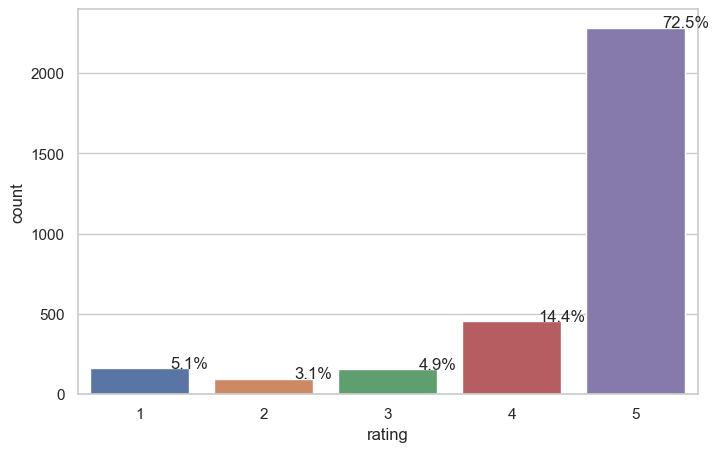

In [12]:
#exploring of "rating" Variable
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
total = float(len(df))
ax = sns.countplot(x="rating", data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')
plt.show()

<AxesSubplot:xlabel='count', ylabel='variation'>

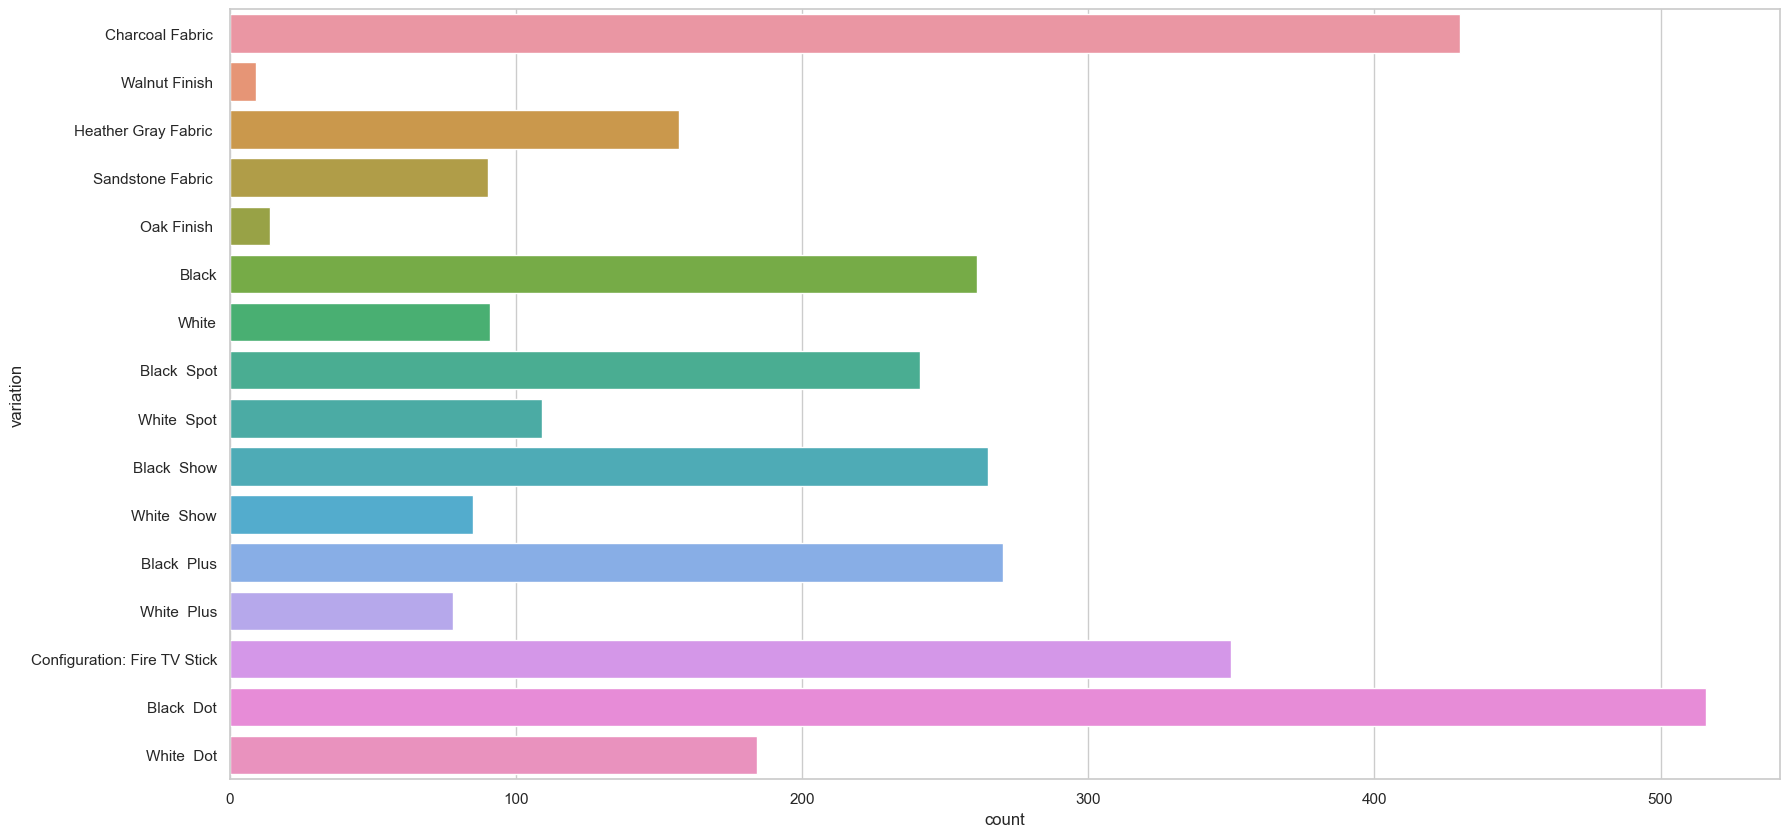

In [13]:
fig = plt.figure(figsize=(20,10))
sns.countplot(y="variation",data=df)

In [14]:
df['variation'].value_counts()

Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

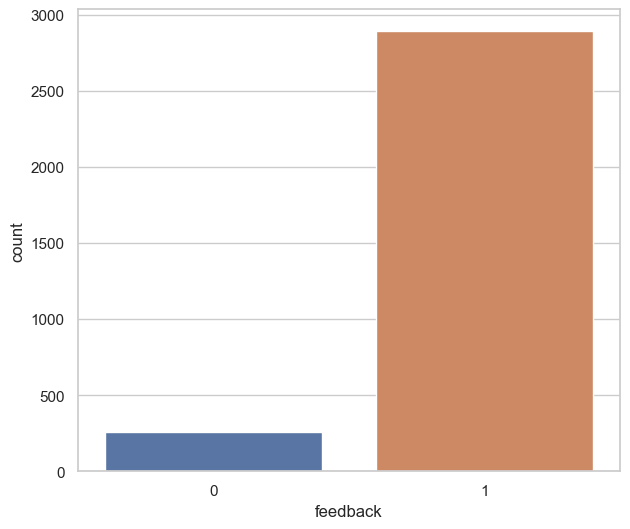

In [15]:
sns.countplot(x='feedback', data=df)
plt.show()

In [16]:
for i in range(10):
    print(df['verified_reviews'].iloc[i],"\n")

Love my Echo! 

Loved it! 

Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. 

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. 

Music 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. 

Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. 

I think this is the 5th one I've purchased. I'm 

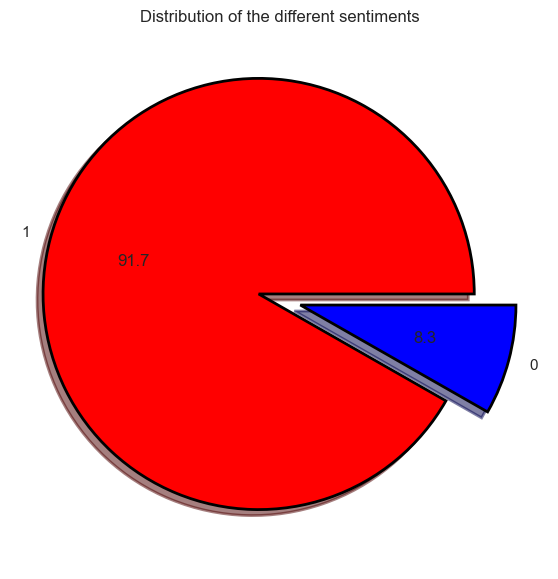

In [17]:
fig = plt.figure(figsize=(7,7))
colors = ("red","blue")
wp = {'linewidth':2, 'edgecolor':'black'}
tags = df['feedback'].value_counts()
explode = (0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f',colors=colors, shadow=True,
          startangle=0, wedgeprops=wp, explode=explode, label='')
plt.title("Distribution of the different sentiments")
plt.show()

In [18]:
positive_reviews = df[df.feedback == 1]
positive_reviews

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1
...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,Black Dot,"Listening to music, searching locations, check...",1
3147,5,Black Dot,"I do love these things, i have them running my...",1
3148,5,White Dot,Only complaint I have is that the sound qualit...,1


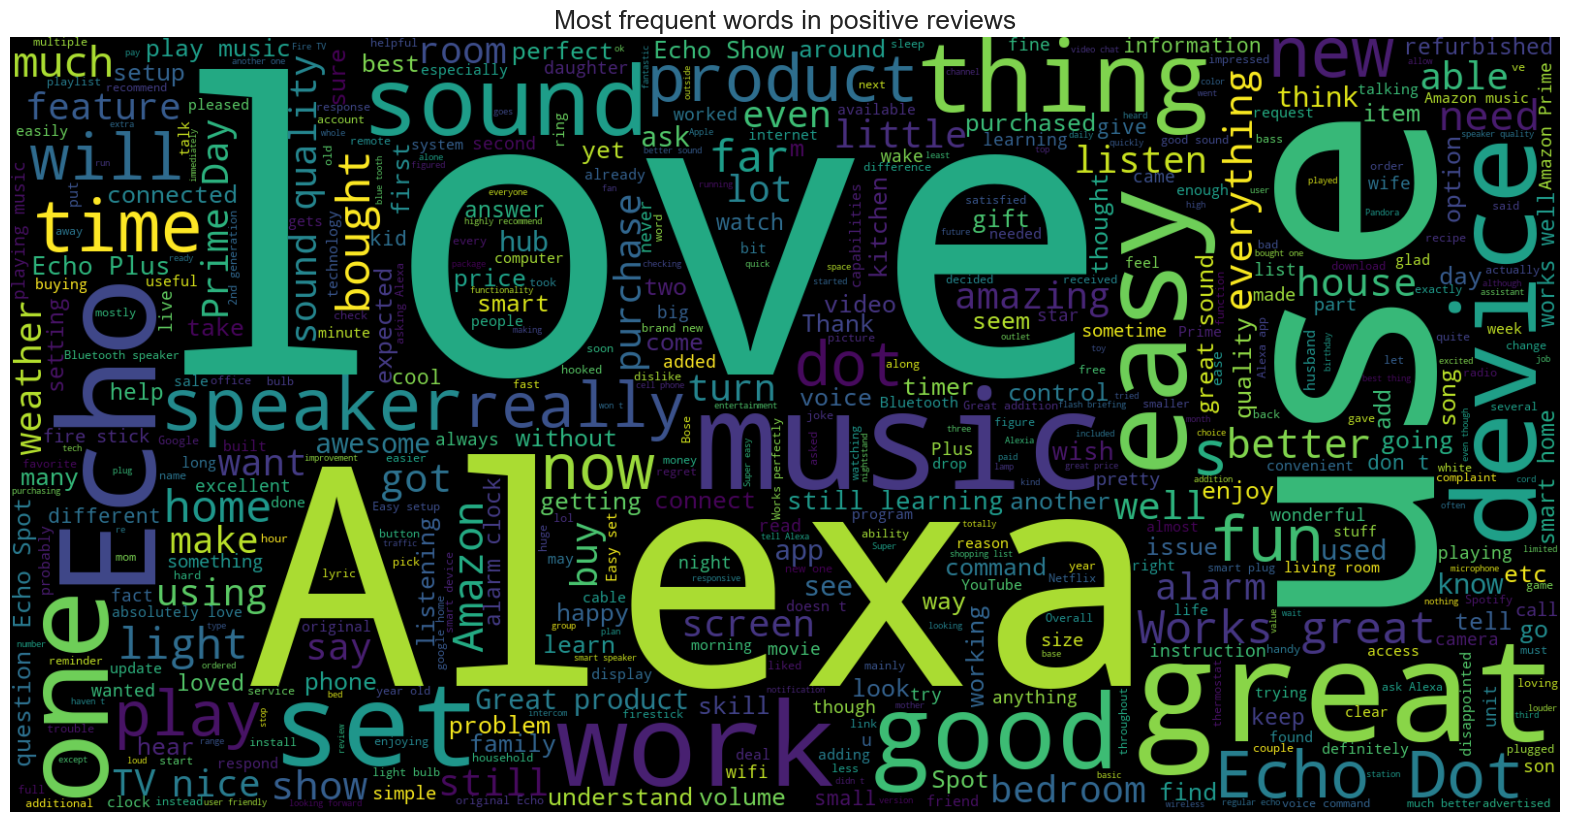

In [19]:
text = ' '.join([word for word in positive_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in positive reviews', fontsize=19)
plt.show()

In [20]:
negative_reviews = df[df.feedback==0]
negative_reviews

,rating,variation,verified_reviews,feedback
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0
115,2,Oak Finish,"It is not what I expected, the product I get i...",0
141,1,Charcoal Fabric,Not much features.,0
159,3,Oak Finish,Sometimes the device don't work as intended.,0
...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,Black Dot,The only negative we have on this product is t...,0
3091,1,Black Dot,I didn’t order it,0


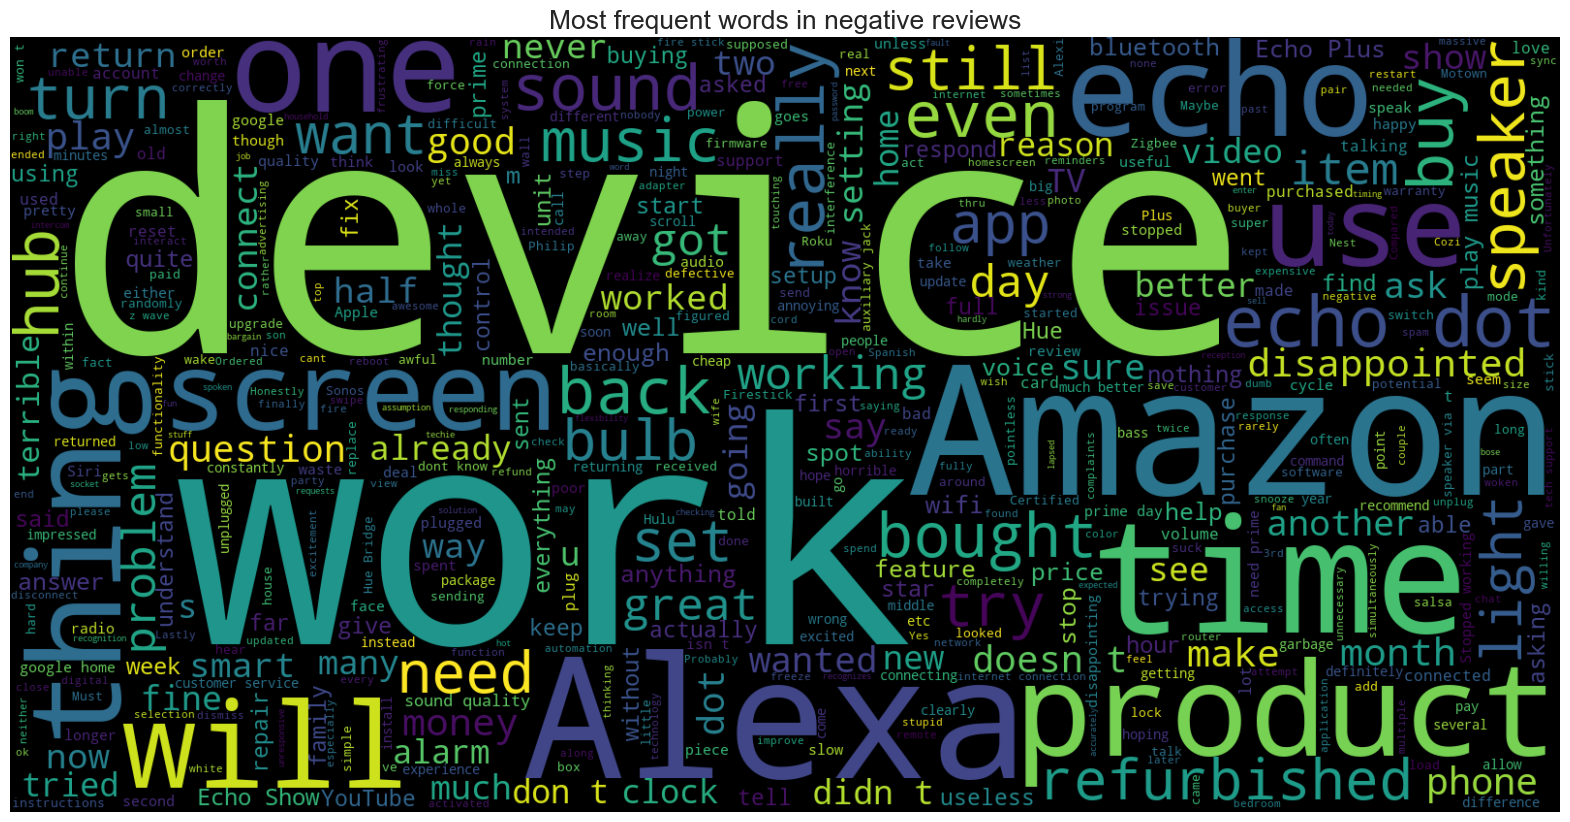

In [21]:
text = ' '.join([word for word in negative_reviews['verified_reviews']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most frequent words in negative reviews', fontsize=19)
plt.show()

In [22]:
verified_analysis = pd.crosstab(df['variation'],df['feedback'], margins='All')
verified_analysis

feedback,0,1,All
variation,,,
Black,35,226,261
Black Dot,36,480,516
Black Plus,28,242,270
Black Show,18,247,265
Black Spot,32,209,241
Charcoal Fabric,12,418,430
Configuration: Fire TV Stick,28,322,350
Heather Gray Fabric,2,155,157
Oak Finish,2,12,14


<AxesSubplot:xlabel='variation'>

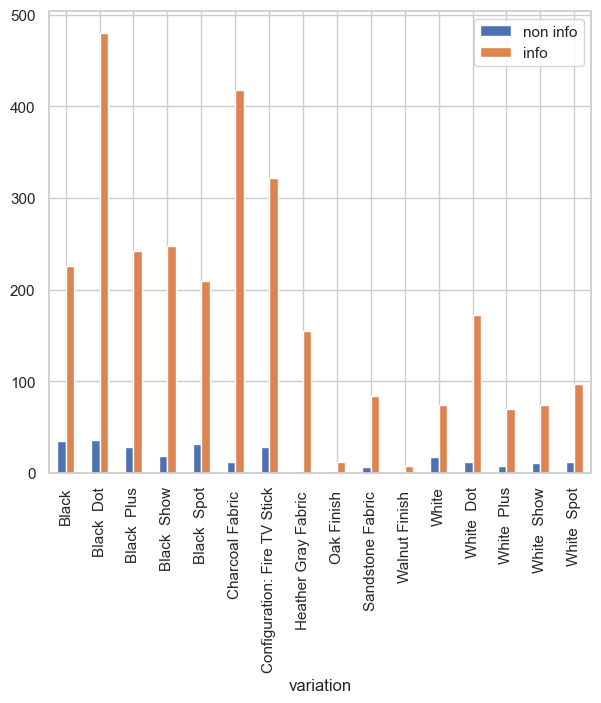

In [23]:
analysis = verified_analysis.reset_index()
analysis.columns = ['variation','non info', 'info', 'All']
analysis.iloc[:-1].plot(x="variation", y=["non info", "info"], kind="bar")

## Analysis to understand per product who many informative and how many not informative reviews are there. 

In [55]:
feedback_analysis = pd.crosstab(df['variation'],df['feedback'], margins='All')
feedback_analysis

feedback,0,1,All
variation,,,
Black,30,216,246
Black Dot,28,442,470
Black Plus,22,215,237
Black Show,11,228,239
Black Spot,22,188,210
Charcoal Fabric,10,396,406
Configuration: Fire TV Stick,20,294,314
Heather Gray Fabric,2,143,145
Oak Finish,2,12,14


<AxesSubplot:xlabel='variation'>

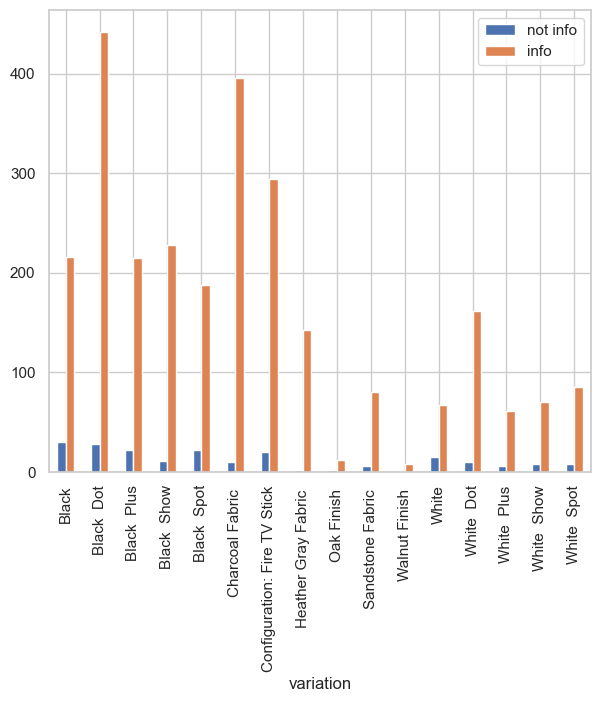

In [56]:
analysis = feedback_analysis.reset_index()
analysis.columns = ['variation','not info', 'info', 'All']
analysis.iloc[:-1].plot(x="variation", y=["not info", "info"], kind="bar")

## Lets check the length quality of reviews we have?

In [26]:
df['review_len'] = df['verified_reviews'].apply(lambda x: len(x.split()))

In [27]:
df

,rating,variation,verified_reviews,feedback,review_len
0,5,Charcoal Fabric,Love my Echo!,1,3
1,5,Charcoal Fabric,Loved it!,1,2
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,Charcoal Fabric,Music,1,1
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,8
3146,5,Black Dot,"Listening to music, searching locations, check...",1,23
3147,5,Black Dot,"I do love these things, i have them running my...",1,83
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,76


## Let's look at the length of the reviews to determine their quality.

In [28]:
# Initialize an empty list to store the counts of reviews within specific length ranges
checklen = []
for i in range(5,50, 5):
    checklen.append(len(df[ (df['review_len']>=i-5) & (df['review_len']<i)]))

In [29]:
checklen

[658, 544, 397, 313, 227, 164, 139, 112, 97]

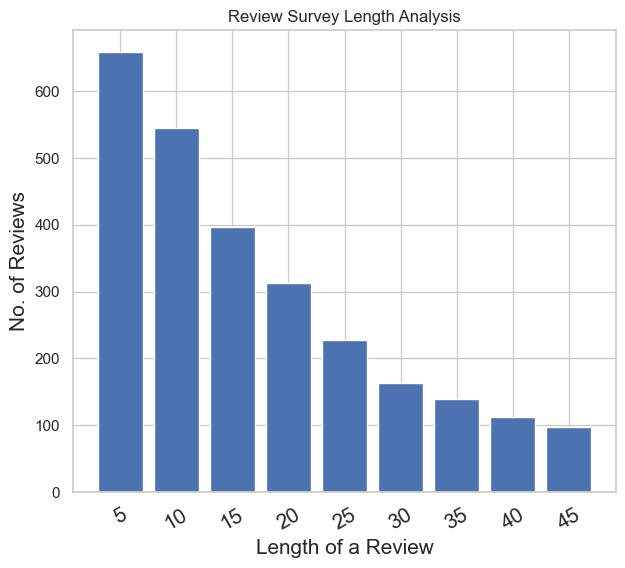

In [61]:
index = np.arange(len(checklen))
plt.bar(index, checklen)
plt.xlabel('Length of a Review', fontsize=15)
plt.ylabel('No. of Reviews', fontsize=15)
plt.xticks(index, range(5,50,5), fontsize=15, rotation=30)
plt.title('Review Survey Length Analysis')
plt.show()

## There are a fair amount of both detailed reviews (with a length of 5 or more) and short reviews (with a length of less than 5).

# Data Preprocessing

## Stage1: Language Detection

In [31]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'verified_reviews']
    try:
        b = rf.language_detection(review)
        if b == 'hi' or b == 'mr':
            bad_reviews.append(indx)
    except:
        bad_reviews.append(indx)
        print("Language exception for:", review)

Language exception for: 😍
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for: 😍
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for: https://www.amazon.com/dp/B073SQYXTW/ref=cm_cr_ryp_prd_ttl_sol_18
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for:  
Language exception for: 👍🏻
Language exception for:  
Language exception for:  
Language exception for:  

In [32]:
print("Number of Bad Reviews at Stage 1: ", len(bad_reviews))

Number of Bad Reviews at Stage 1:  85


In [33]:
df[df.index.isin(bad_reviews)]

,rating,variation,verified_reviews,feedback,review_len
60,5,Heather Gray Fabric,😍,1,1
85,5,Heather Gray Fabric,,1,0
183,3,Heather Gray Fabric,,1,0
219,5,Sandstone Fabric,,1,0
374,1,Black,,0,0
...,...,...,...,...,...
3114,3,Black Dot,,1,0
3120,5,Black Dot,,1,0
3123,4,Black Dot,,1,0
3126,5,Black Dot,,1,0


In [34]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

## Stage 2: Gibberish Reviews

In [35]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'verified_reviews']
    if rf.gibberish_detection(review, prefix_path = 'utils'):
        bad_reviews.append(indx)

In [36]:
print("Number of Bad Reviews at Stage 2: ", len(bad_reviews))

Number of Bad Reviews at Stage 2:  3


In [37]:
bad_reviews

[1183, 1759, 2128]

In [38]:
df[df.index.isin(bad_reviews)]

,rating,variation,verified_reviews,feedback,review_len
1183,2,Black Spot,Meh,0,1
1759,5,Black Plus,My new BFF!,1,3
2128,5,Configuration: Fire TV Stick,ok,1,1


In [39]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

## Stage 3: Profanity Detection

+ At times reviewers are not happy with the delivery or service out of frustration they type profanity words in reviews. 
+ Profanity content also penalises SEO ranking
+ We decided to filter out both english and hinglish profanity reviews. 



In [40]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'verified_reviews']
    if rf.english_swear_check(review) or rf.hindi_swear_check(review):
        bad_reviews.append(indx)

In [41]:
print("Number of Bad Reviews at Stage 3: ", len(bad_reviews))

Number of Bad Reviews at Stage 3:  3


In [42]:
df[df.index.isin(bad_reviews)]

,rating,variation,verified_reviews,feedback,review_len
1282,5,Black Spot,Absolutely love it. After much persuasion from...,1,37
2595,5,White Dot,HANDY AS HELL 10/10 RECOMMEND,1,5
2933,5,White Dot,HANDY AS HELL 10/10 RECOMMEND,1,5


In [43]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

## Stage 4: Spelling Correction (Optional Stage not that necessary)
+ Trying to improve quality of reviews which have high confidence spell errors. Like withut -> without

## The apply() function in pandas is known to have performance issues when applied to large datasets

## Stage 4.1: Company Tag (Optional Stage)

In [44]:
bad_reviews = []
for indx in df.index:
    review = df.at[indx, 'verified_reviews']
    if rf.competitive_brand_tag(review):
        bad_reviews.append(indx)

In [45]:
print("Number of Bad Reviews at Stage 4.1: ", len(bad_reviews))

Number of Bad Reviews at Stage 4.1:  191


In [46]:
df[df.index.isin(bad_reviews)]

,rating,variation,verified_reviews,feedback,review_len
20,5,Charcoal Fabric,Love the Echo and how good the music sounds pl...,1,45
49,3,Charcoal Fabric,No different than Apple. To play a specific li...,1,38
63,5,Charcoal Fabric,I use it primarily to play music. It works wo...,1,36
86,5,Sandstone Fabric,The echo works well. I was able to sync it wit...,1,16
87,5,Charcoal Fabric,"Works great, but I don't think Amazon should c...",1,24
...,...,...,...,...,...
2939,1,Black Dot,I was really happy with my original echo so i ...,0,126
2950,5,Black Dot,this is so much fun to play with - I just ask ...,1,126
2964,5,Black Dot,I had put this off for awhile but finally got ...,1,116
2969,4,Black Dot,I love my Dot and am hoping to add a couple mo...,1,159


In [47]:
df = df[~df.index.isin(bad_reviews)].reset_index(drop = True)

In [48]:
print("Total Count of Reviews after preprocessing: ", len(df))

Total Count of Reviews after preprocessing:  2868


In [49]:
df

,rating,variation,verified_reviews,feedback,review_len
0,5,Charcoal Fabric,Love my Echo!,1,3
1,5,Charcoal Fabric,Loved it!,1,2
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,38
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,34
4,5,Charcoal Fabric,Music,1,1
...,...,...,...,...,...
2863,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,8
2864,5,Black Dot,"Listening to music, searching locations, check...",1,23
2865,5,Black Dot,"I do love these things, i have them running my...",1,83
2866,5,White Dot,Only complaint I have is that the sound qualit...,1,76


In [50]:
df.to_csv('data/Preprocessed_Reviews.csv',index = False)

### Initial Count of Reviews was: 3150
### Final Count of Reviews is: 2868